In [61]:
from skimage import transform


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [62]:
DATA_TRAIN = "data/Data Train for BDC 2023 - Penyisihan/"
DATA_TEST = "data/test/"

In [63]:
train = pd.read_csv(DATA_TRAIN + "DataTrain.csv", delimiter=";").drop(columns=["Unnamed: 0"])
train_imgs = train["NameofFile"]
train.head()

,Vehicleregistrationplate,NameofFile
0,A7814,DataTrain1.png
1,B1074QO,DataTrain2.png
2,B1031QO,DataTrain3.png
3,B187EDA,DataTrain4.png
4,B1089VD,DataTrain5.png


In [64]:
train_imgs[482]

'DataTrain483.png'

In [66]:
test = pd.read_csv(DATA_TEST + "DataTest.csv", delimiter=";").drop(columns=["Unnamed: 0"])
test_imgs = [f"DataTest{i}.png" for i in range(1, len(test) + 1)]

test.head()

,Name of File
0,DataTest1.png
1,DataTest2.png
2,DataTest3.png
3,DataTest4.png
4,DataTest5.png


(570, 1321, 3)


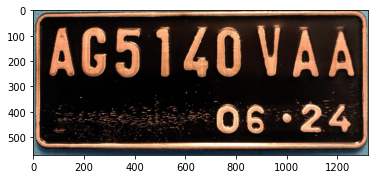

In [67]:
img = cv2.imread(DATA_TRAIN + "DataTrain392.png")
print(img.shape) # [h, w, channel]
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


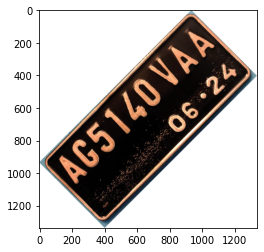

In [68]:
transformed_image = transform.rotate(img, angle=45, cval=255, resize=True)
plt.imshow(transformed_image)

In [69]:
img = cv2.imread("./data/train/" + train_imgs[0])
img

In [70]:
DATA_TRAIN + train_imgs[482]

'data/Data Train for BDC 2023 - Penyisihan/DataTrain483.png'

In [71]:
from tqdm import tqdm

In [102]:
angles = [10, 25, -10, -25]
labels = []
augmented_imgs = []
for i in tqdm(range(len(train_imgs))):
    img = cv2.imread("./data/Data Train for BDC 2023 - Penyisihan/" + train_imgs[i])
    cv2.imwrite("./deep-text-recognition-benchmark/data_augmen/train/" + f"DataTrain{i}_0.png", img)
    labels.append(train["Vehicleregistrationplate"][i])
    augmented_imgs.append("./data/Data Train for BDC 2023 - Penyisihan/" + train_imgs[i])
    for angle in angles:
        transformed_image = transform.rotate(img, angle=angle, cval=255, resize=True)
        transformed_image_rgb = cv2.cvtColor((transformed_image * 255).astype(np.uint8), cv2.COLOR_BGR2RGB)
        cv2.imwrite("./deep-text-recognition-benchmark/data_augmen/train/" + f"DataTrain{i+1}_{angle}.png", transformed_image_rgb)
        labels.append(train["Vehicleregistrationplate"][i])
        augmented_imgs.append("./data/Data Train for BDC 2023 - Penyisihan/" + train_imgs[i])

100%|██████████| 800/800 [06:18<00:00,  2.11it/s]


In [95]:
import glob

gt = glob.glob("./data/augmented/*.png")

In [108]:
len(gt)

4000

In [109]:
len(labels)

4000

In [98]:
gts = []

for i in range(len(gt)):
    gts.append("train/" + gt[i].split("\\")[1])

gt_df = pd.DataFrame({
    "path": gts,
    "label": labels
})

gt_df.to_csv("gt.txt", sep="\t", index=False)

In [107]:
for i, p in enumerate(gts):
    with open("gt.txt", "a+") as f:
        f.write(f"{p}\t{labels[i]}\n")

In [103]:
gt_df

,path,label
0,train/DataTrain0_0.png,A7814
1,train/DataTrain1_10.png,A7814
2,train/DataTrain1_25.png,A7814
3,train/DataTrain1_-10.png,A7814
4,train/DataTrain1_-25.png,A7814
...,...,...
3995,train/DataTrain799_0.png,AB6315SE
3996,train/DataTrain800_10.png,AB6315SE
3997,train/DataTrain800_25.png,AB6315SE
3998,train/DataTrain800_-10.png,AB6315SE
